In [1]:
import joblib
import pandas as pd

import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, ColumnDataSource

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

%matplotlib inline
output_notebook()

tweets = pd.read_csv('../tweets/tweets_clean.csv',
                     header=0,
                     parse_dates=['date'])
tweets.dropna(subset=['lemmas'], inplace=True)
tweets.reset_index(drop=True, inplace=True)

doc_topics = pd.read_csv('../scripts/topic_modeling_objects/topics_per_doc_LDA.csv',
                         header=0)

tweets['topic'] = doc_topics['dominant_topic']

# Load vectorizer
with open('../scripts/topic_modeling_objects/sklearn_vect.joblib', 'rb') as f:
    cv = joblib.load(f)

# Load term frequency matrix
with open('../scripts/topic_modeling_objects/sklearn_CV.joblib', 'rb') as f:
    tf = joblib.load(f)

# Load feature names
with open('../scripts/topic_modeling_objects/sklearn_feature_names.joblib', 'rb') as f:
    tf_names = joblib.load(f)

# Load fitted LDA model
with open('../scripts/topic_modeling_objects/sklearn_LDA_model.joblib', 'rb') as f:
    lda_model = joblib.load(f)
    
lda_W = lda_model.transform(tf)

Loading BokehJS ...

In [2]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, cv, mds='tsne')
panel

D:\jmelt\Documents\UNCC\ITIS4510\Russian_Tweets\venv\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
2     -682.815735   70.263878       1        1  8.306187
14    -723.211487 -385.643585       2        1  7.528027
12      13.848332 -307.119049       3        1  7.514165
9      288.035095  665.456177       4        1  7.103961
7     -314.522400 -651.348938       5        1  7.075956
8     -456.407104  402.375488       6        1  6.924296
4      121.676018 -711.754944       7        1  6.756029
10    -194.875839   78.973602       8        1  6.470070
3     -172.725815  695.122803       9        1  6.454657
11     431.660461 -418.828766      10        1  6.294425
0       52.219143  333.540344      11        1  6.270424
13     233.579193  -10.103997      12        1  6.070415
5      670.494995  -77.283020      13        1  5.876532
6      509.721863  308.626892      14        1  5.686144
1     -357.641724 -236.137482      15        1  5.668712, topic_info=     Category          Freq                Term         Total  loglift  \
term                                                                     
2259  Default  31299.000000               trump  31299.000000  30.0000   
1315  Default   6181.000000                make   6181.000000  29.0000   
1506  Default   8476.000000               obama   8476.000000  28.0000   
405   Default   7663.000000             clinton   7663.000000  27.0000   
1893  Default   5670.000000                 say   5670.000000  26.0000   
918   Default   4906.000000                good   4906.000000  25.0000   
1203  Default   4422.000000                know   4422.000000  24.0000   
2331  Default   4645.000000                vote   4645.000000  23.0000   
2345  Default   4539.000000                want   4539.000000  22.0000   
1467  Default   5430.000000                 new   5430.000000  21.0000   
78    Default   4179.000000             america   4179.000000  20.0000   
1635  Default   4287.000000             politic   4287.000000  19.0000   
993   Default   5122.000000             hillary   5122.000000  18.0000   
2189  Default   3880.000000               think   3880.000000  17.0000   
545   Default   4058.000000                 day   4058.000000  16.0000   
1468  Default   4869.000000                news   4869.000000  15.0000   
2137  Default   3906.000000                take   3906.000000  14.0000   
310   Default   3638.000000                call   3638.000000  13.0000   
1923  Default   3784.000000                 see   3784.000000  12.0000   
893   Default   3846.000000                 get   3846.000000  11.0000   
1586  Default   6875.000000              people   6875.000000  10.0000   
2147  Default   3920.000000                tcot   3920.000000   9.0000   
1672  Default   3821.000000           president   3821.000000   8.0000   
1844  Default   3500.000000               right   3500.000000   7.0000   
911   Default   3599.000000                  go   3599.000000   6.0000   
1298  Default   3532.000000                love   3532.000000   5.0000   
2426  Default   3529.000000                year   3529.000000   4.0000   
2403  Default   3519.000000               woman   3519.000000   3.0000   
1456  Default   3437.000000                need   3437.000000   2.0000   
1324  Default   3504.000000                 man   3504.000000   1.0000   
...       ...           ...                 ...           ...      ...   
2270  Topic15   2181.288843                 try   2182.220514   2.8698   
1425  Topic15   1734.096628                much   1735.028298   2.8697   
2304  Topic15   1492.190117                 use   1493.121788   2.8696   
1729  Topic15   1390.803649                 put   1391.735319   2.8695   
188   Topic15   1131.726259              become   1132.657929   2.8694   
983   Topic15   1018.098058                hear   1019.029728   2.8693   
913   Topic15    970.534337                 god    971.466007   2.8692   
392   Topic15    930.893650 

In [4]:
topics_per_month = tweets.groupby([tweets.date.dt.year, tweets.date.dt.month, tweets.topic]).size().to_frame('counts')
topics_per_month.index.rename(['year', 'month'], level=[0, 1], inplace=True)

topics_per_month = topics_per_month.unstack(level=2, fill_value=0)

# # Collapse index back into a single date
topics_per_month.columns = topics_per_month.columns.droplevel(0)
topics_per_month.reset_index(inplace=True)
topics_per_month['date'] = pd.to_datetime(dict(year=topics_per_month.year,
                                               month=topics_per_month.month,
                                               day=[1] * len(topics_per_month)))
topics_per_month.drop(['year', 'month'], axis=1, inplace=True)
topics_per_month.columns = topics_per_month.columns.values.astype('str')

In [5]:
def monthly_topics(tweets_df):
    topics = [str(i) for i in range(15)]

    palette = ['#E53935', '#0288D1', '#8E24AA', '#00796B', '#689F38',
               '#D81B60', '#5E35B1', '#AFB42B', '#FBC02D', '#90A4AE',
               '#F57C00', '#1976D2', '#3949AB', '#0097A7', '#8D6E63']

    src = ColumnDataSource(tweets_df.to_dict('list'))

    p = figure(width=1200, height=800,
               x_axis_type='datetime',
               x_axis_label='Date',
               y_axis_label='Number of tweets',
               title='Tweets per month')

    renderers = p.vbar_stack(topics, x='date', color=palette,
                             width=3.6e8 * 5,
                             legend=["Topic " + x for x in topics],
                             source=src)

    legend = p.legend[0]
    p.legend[0].plot = None
    p.add_layout(legend, 'right')

    for r in renderers:
        topic = r.name
        hover = HoverTool(tooltips=[('Date', '@date{%B-%Y}'),
                                    ('Topic {}'.format(topic), '@$name')],
                          formatters={'date': 'datetime'},
                          mode='mouse',
                          renderers=[r])
        p.add_tools(hover)

    p.xgrid.grid_line_color = None

    return p

In [6]:
topics_plot = monthly_topics(topics_per_month)
show(topics_plot)

In [7]:
monthly_props = topics_per_month.drop('date', axis=1).apply(lambda x: 100. * x / x.sum(), axis=1)
monthly_props['date'] = topics_per_month['date']

In [8]:
topics_prop_plot = monthly_topics(monthly_props)
show(topics_prop_plot)

In [9]:
topics_daily = tweets.groupby([tweets.date.dt.date,
                               tweets.topic]).size().to_frame().unstack(level=1, fill_value=0)
topics_daily.columns = topics_daily.columns.droplevel(0)
topics_daily.columns = topics_daily.columns.values.astype('str')

topics_daily['sum'] = topics_daily.sum(axis=1)
topics_daily = topics_daily[topics_daily['sum'] >= 100]
topics_daily.drop('sum', axis=1, inplace=True)

topics_daily = topics_daily.apply(lambda x: x / x.sum(), axis=1)

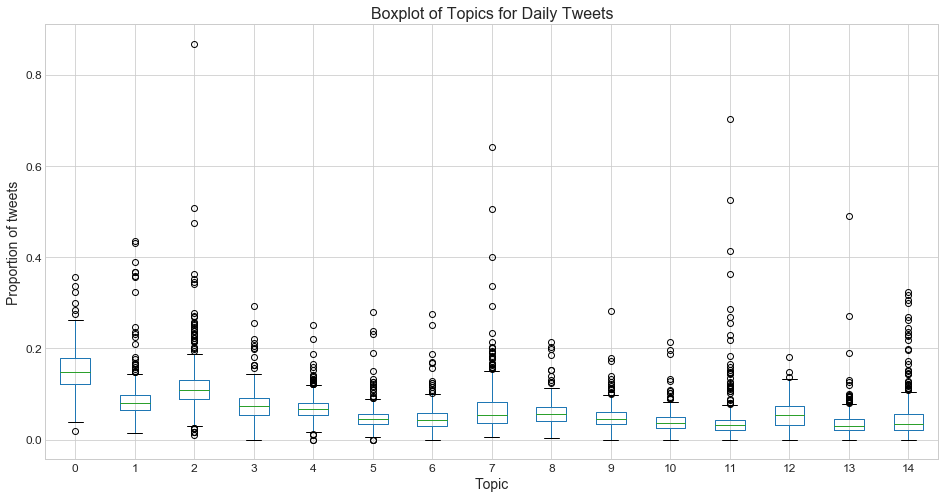

In [12]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(16, 8))
topics_daily.boxplot()
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Proportion of tweets', fontsize=14)
plt.title('Boxplot of Topics for Daily Tweets', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

fig.savefig('../visuals/tweets_boxplot.png')

plt.show()

In [13]:
print(topics_daily.idxmax())

0     2016-11-02
1     2016-02-29
2     2016-07-21
3     2016-11-23
4     2016-09-26
5     2016-10-05
6     2016-12-19
7     2015-12-16
8     2016-10-17
9     2016-11-08
10    2017-08-03
11    2017-06-23
12    2016-09-01
13    2016-03-22
14    2016-06-20
dtype: object
